#  Итоговый проект на тему «Анализ данных»
## выполнил студент: Вихарев Илья Олегович (МКм-2301-51-00)

## 1. Загрузка библиотек

In [1]:
import numpy as np # Подключаем модуль линейной алгебры
import pandas as pd # Подключаем обработку данных
import matplotlib.pyplot as plt # Подключаем модуль визуализации
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Создание рабочей папки, загрузка датасета с Kaggle, распаковка zip. 

P.S Для проверки можно вручную скачать или воспользоваться скриптом ниже: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [102]:
# Установить kagglehub если отсутствует. 

In [103]:
pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import os  
os.mkdir('VyatSU_Final_Project')  

In [105]:

path = os.getcwd() + '\\VyatSU_Final_Project\\vehicles'
path

'c:\\Github Repo\\MashinnoeObuchenie\\VyatSU_RPPO\\VyatSU_Final_Project\\VyatSU_Final_Project\\vehicles'

In [106]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Set the path to the file you'd like to load
file_path = ""
# Load the latest version
path_dataset = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
print("Path to dataset files:", path_dataset+'\\vehicles.csv')

c:\Users\ilyav\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 58%|█████▊    | 153M/262M [00:20<00:14, 7.69MB/s] 


KeyboardInterrupt: 

In [ ]:
# перенести файлы с кеша в рабочую папку
import os
import shutil
from pathlib import Path  
# Установить целевой каталог  
path = Path(path)
path_dataset = Path(path_dataset)
os.replace(path_dataset, path)

##### Очистить кеш. (Можете вручную удалить кэш kaggle по вышеуказанному пути)

In [ ]:
shutil.rmtree(path_dataset.parents[4]) 

## 3. Предварительная обработка данных, разведочный анализ EDA.

####

In [2]:
df = pd.read_csv('vehicles//vehicles.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7313733785,https://limaohio.craigslist.org/cto/d/bellefon...,lima / findlay,https://limaohio.craigslist.org,3200,2007.0,chevrolet,malibu,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00A0A_i4d2Ik7x2s...,"2007 Chevy Malibu, reliable car! Runs great, l...",NaN,oh,40.360500,-83.757100,2021-04-28T06:52:26-0400
1,7307849209,https://billings.craigslist.org/ctd/d/billings...,billings,https://billings.craigslist.org,7977,2014.0,chevrolet,cruze,NaN,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00E0E_5oSJIFU4Du...,"2014 Chevrolet, Chevy Cruze 2LT Auto ☎ 406-283...",NaN,mt,45.762900,-108.539000,2021-04-16T12:34:14-0600
2,7315319709,https://atlanta.craigslist.org/sat/ctd/d/tucke...,atlanta,https://atlanta.craigslist.org,5200,2015.0,bmw,x1 xdrive28i,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00Y0Y_9UiJKCFQaQ...,EVERYONE APPROVED!!! GUARANTEED APPROVALS!!! ...,NaN,ga,33.857000,-84.216000,2021-05-01T11:42:41-0400
3,7307107125,https://winstonsalem.craigslist.org/ctd/d/wins...,winston-salem,https://winstonsalem.craigslist.org,24990,2017.0,bmw,2 series 230i coupe 2d,good,NaN,...,NaN,coupe,blue,https://images.craigslist.org/00101_9EYP0fIHZX...,Carvana is the safer way to buy a car During t...,NaN,nc,36.100000,-80.240000,2021-04-15T08:21:37-0400
4,7303537394,https://kirksville.craigslist.org/ctd/d/atlant...,kirksville,https://kirksville.craigslist.org,52990,2020.0,jaguar,e-pace p300 r-dynamic se,good,NaN,...,NaN,other,white,https://images.craigslist.org/00p0p_4qfF2tImVZ...,Carvana is the safer way to buy a car During t...,NaN,mo,33.779214,-84.411811,2021-04-08T05:30:37-0500
5,7315016812,https://honolulu.craigslist.org/big/ctd/d/kail...,hawaii,https://honolulu.craigslist.org,0,2018.0,chevrolet,cruze,NaN,NaN,...,full-size,sedan,white,https://images.craigslist.org/00L0L_5qHfJIZy9G...,Vehicle Description- Options:Air Conditioning;...,NaN,hi,19.644813,-156.003214,2021-04-30T10:52:44-1000
6,7316337506,https://sacramento.craigslist.org/ctd/d/sacram...,sacramento,https://sacramento.craigslist.org,40488,2016.0,chevrolet,silverado 1500 lt 4wd,good,8 cylinders,...,NaN,pickup,NaN,https://images.craigslist.org/00404_bebw1E51Ry...,2016 * Chevrolet * * Silverado 1500 LT 4WD *...,NaN,ca,38.610767,-121.422557,2021-05-03T11:32:19-0700
7,7315381517,https://ventura.craigslist.org/cto/d/north-hil...,ventura county,https://ventura.craigslist.org,6500,2011.0,toyota,prius,like new,4 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00S0S_5Xc3nKjzL5...,2011 toyota prius Super limpio dentro y fuera ...,NaN,ca,34.236600,-118.475800,2021-05-01T10:25:15-0700
8,7315295845,https://spokane.craigslist.org/ctd/d/spokane-2...,spokane / coeur d'alene,https://spokane.craigslist.org,0,2011.0,jeep,grand cherokee,NaN,NaN,...,NaN,other,black,https://images.craigslist.org/00E0E_lpXcz0fmzn...,2011 Jeep Grand Cherokee Limited Offered b...,NaN,id,47.656773,-117.218613,2021-05-01T08:00:39-0700
9,7313961736,https://reno.craigslist.org/ctd/d/sacramento-2...,reno / tahoe,https://reno.craigslist.org,13495,2013.0,subaru,forester,excellent,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00l0l_g7f4uNj7XO...,ONE OWNER! AWD! PREMIUM! PANORAMIC SUNROOF! FR...,NaN,ca,38.609300,-121.444300,2021-04-28T11:45:27-0700


#### Посмотрим размерность датасета и его столбцы

In [3]:
print(df.shape)
print(df.columns)

(426880, 26)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

В датафрейме 19 столбцов имеют тип object, 5 столбцов имеют тип float64, 2 столбца int64

1. id: уникальное id объявления 
1. url: ссылка на объявление (не работает)           
1. region: регион продажи авто (город/штат США)        
1. region_url: ссылка на объявление (не работает)      
1. price: цена в долларах     
1. year: год выпуска автомобиля     
1. manufacturer: марка авто (завод-изготовитель)
1. model: модель авто         
1. condition: состояние авто     
1. cylinders: кол-во цилиндров     
1. fuel: тип потребляемого топлива          
1. odometer: пробег      
1. title_status: юридический статус авто в страховой компании
1. transmission: тип КПП
1. VIN: вин-номер авто           
1. drive: тип привода     
1. size:  размер авто (по американской классификации https://housegrail.com/types-of-car-sizes-explained)  
1. type:  тип авто     
1. paint_color: цвет авто   
1. image_url: ссылка на фото авто (не работает)    
1. description: описание   
1. county: страна (Null, что очевидно, так как это всё американские объявления)     
1. state: штат США        
1. lat: ширина (координаты)           
1. long: долгота (координаты)          
1. posting_date: дата размещения поста

### 3.1 Удаление ненужных столбцов, удаление строк с Null

In [5]:
#Удаляем ненужные нам столбцы
df = df.drop("id", axis=1)
df = df.drop("region", axis=1)
df = df.drop("state", axis=1)
df = df.drop("model", axis=1)
df = df.drop("url", axis=1)
df = df.drop("region_url", axis=1)
df = df.drop("image_url", axis=1)
df = df.drop("description", axis=1)
df = df.drop("county", axis=1)
df = df.drop("posting_date", axis=1)
df = df.drop("VIN", axis=1)
df = df.drop("lat", axis=1)
df = df.drop("long", axis=1)
df = df.drop("title_status", axis=1)
df = df.drop("size", axis=1)


In [6]:
# Удалим строки с пустыми значениями (Смысла нет заполнять пустые значения. Нам вполне хватит количества записей для анализа и обучения модели)
df = df.dropna()

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 117169 entries, 12 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   transmission  117169 non-null  object 
 8   drive         117169 non-null  object 
 9   type          117169 non-null  object 
 10  paint_color   117169 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.7+ MB
None


### 3.2 Рассмотрим уникальные значения и перекодируем категориальные данные в численные. 

Подсчитаем количество уникальных значений в столбцах и создадим таблицу замен значений

In [8]:

def get_unique(df: pd.DataFrame, stolbec: str):
    """
    Возвращает список замен и кол-во уникальных элементов в столбце
    """
    df_uniques = pd.melt(
        frame=df,
        value_vars=[stolbec],
    )
    df_uniques = (
        pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
        .sort_index(level=[0, 1])
        .rename(columns={"value": "count"})
        .reset_index()
    )
    return df_uniques
 
     
              
manufacturer_unique = get_unique(df,"manufacturer")                    
condition_unique = get_unique(df,"condition")           
cylinders_unique = get_unique(df,"cylinders")           
fuel_unique = get_unique(df,"fuel")                           
transmission_unique = get_unique(df,"transmission")                        
drive_unique = get_unique(df,"drive")               
type_unique = get_unique(df,"type")                
paint_color_unique = get_unique(df,"paint_color")       

         
    



In [9]:
manufacturer_unique

,variable,value,count
0,manufacturer,acura,1269
1,manufacturer,alfa-romeo,45
2,manufacturer,aston-martin,5
3,manufacturer,audi,1304
4,manufacturer,bmw,3259
5,manufacturer,buick,1575
6,manufacturer,cadillac,1732
7,manufacturer,chevrolet,18045
8,manufacturer,chrysler,2014
9,manufacturer,datsun,22


In [10]:
condition_unique

,variable,value,count
0,condition,excellent,52698
1,condition,fair,3861
2,condition,good,46997
3,condition,like new,12684
4,condition,new,623
5,condition,salvage,306


In [11]:
cylinders_unique

,variable,value,count
0,cylinders,10 cylinders,883
1,cylinders,12 cylinders,63
2,cylinders,3 cylinders,218
3,cylinders,4 cylinders,35985
4,cylinders,5 cylinders,930
5,cylinders,6 cylinders,43425
6,cylinders,8 cylinders,35350
7,cylinders,other,315


In [12]:
fuel_unique

,variable,value,count
0,fuel,diesel,6519
1,fuel,electric,193
2,fuel,gas,107248
3,fuel,hybrid,1323
4,fuel,other,1886


In [13]:
transmission_unique

,variable,value,count
0,transmission,automatic,96456
1,transmission,manual,8394
2,transmission,other,12319


In [14]:
drive_unique

,variable,value,count
0,drive,4wd,49575
1,drive,fwd,39795
2,drive,rwd,27799


In [15]:
type_unique 

,variable,value,count
0,type,SUV,27674
1,type,bus,182
2,type,convertible,3378
3,type,coupe,8378
4,type,hatchback,4413
5,type,mini-van,2710
6,type,offroad,499
7,type,other,3408
8,type,pickup,13014
9,type,sedan,31138


In [16]:
paint_color_unique

,variable,value,count
0,paint_color,black,22314
1,paint_color,blue,12726
2,paint_color,brown,3365
3,paint_color,custom,2601
4,paint_color,green,3701
5,paint_color,grey,12533
6,paint_color,orange,699
7,paint_color,purple,350
8,paint_color,red,12677
9,paint_color,silver,16890


Переход к числовым данным

In [17]:
# Словари для перехода к числовым данным
condition_dict = {'excellent': 8, 'fair': 6, 'good': 7, 'like new': 9, 'new': 10, 'salvage': 5}
cylinders_dict = {'10 cylinders': 10, '12 cylinders': 12, '3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, 'other': 1}

# Выполняем замену в столбцах
               
df.condition = df.condition.apply(lambda x : condition_dict[x])           
df.cylinders = df.cylinders.apply(lambda x : cylinders_dict[x])       

df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
12,30000,2014.0,jeep,8,6,gas,52108.0,automatic,4wd,offroad,white
14,5000,2013.0,chevrolet,8,4,gas,151000.0,automatic,fwd,sedan,black
19,11995,2009.0,mercedes-benz,8,6,gas,102757.0,automatic,rwd,sedan,white
20,7995,2011.0,toyota,8,4,gas,89694.0,automatic,fwd,sedan,grey
27,3200,2006.0,chrysler,8,6,gas,106010.0,automatic,4wd,wagon,silver


In [18]:

## Encoding categorical features
categorical_columns = ["type","paint_color","fuel","transmission","drive"]
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df['year'] = (df['year']).astype(int)
df['odometer'] = df['odometer'].astype(int)
df.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
12,30000,2014,jeep,8,6,2,52108,0,0,6,10
14,5000,2013,chevrolet,8,4,2,151000,0,1,9,0
19,11995,2009,mercedes-benz,8,6,2,102757,0,2,9,10
20,7995,2011,toyota,8,4,2,89694,0,1,9,5
27,3200,2006,chrysler,8,6,2,106010,0,0,12,9
29,6495,2007,kia,9,6,2,187003,0,1,0,3
30,14495,2008,jeep,7,6,2,113573,2,0,0,5
33,10999,2015,volkswagen,9,4,2,90000,0,0,0,9
39,25590,2016,nissan,7,6,2,38282,2,1,8,9
40,4995,2003,ford,8,8,2,229692,0,2,0,9


### 3.3 Рассмотрим статистические данные через describe и удалим шум в данных. 

Метод describe показывает основные статистические характеристики каждого числового признака (типы int64 и float64): количество значений, не являющихся пропущенными, среднее значение, стандартное отклонение, диапазон, медиана, квартили 0,25 и 0,75.

In [19]:
df.describe()

,price,year,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,1.171690e+05,117169.000000,117169.000000,117169.000000,117169.000000,1.171690e+05,117169.000000,117169.000000,117169.000000,117169.000000
mean,6.082322e+04,2009.400149,7.644044,5.995571,1.930562,1.122838e+05,0.281918,0.814149,6.040847,5.623458
std,1.140808e+07,9.925172,0.747824,1.633131,0.543190,2.247850e+05,0.642434,0.791092,4.065271,4.016522
min,0.000000e+00,1900.000000,5.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.700000e+03,2006.000000,7.000000,4.000000,2.000000,5.566600e+04,0.000000,0.000000,2.000000,1.000000
50%,1.099300e+04,2012.000000,8.000000,6.000000,2.000000,1.027990e+05,0.000000,1.000000,8.000000,8.000000
75%,2.275000e+04,2015.000000,8.000000,8.000000,2.000000,1.478480e+05,0.000000,1.000000,9.000000,10.000000
max,3.736929e+09,2022.000000,10.000000,12.000000,4.000000,1.000000e+07,2.000000,2.000000,12.000000,11.000000


Рассмотрим гистограммы для price, odometer, year

In [29]:
df_price = df[df['price'] < 30000]
df_price = df_price[df_price['price'] > 5000]

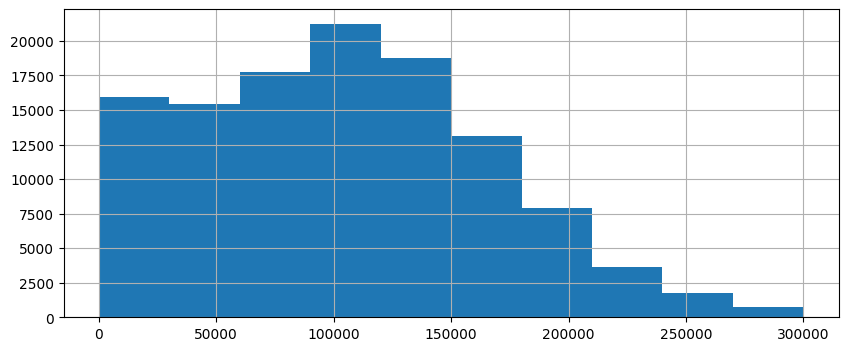

In [30]:
df_odometer = df[df['odometer'] < 300000]
df_odometer['odometer'].hist(figsize=(10, 4));

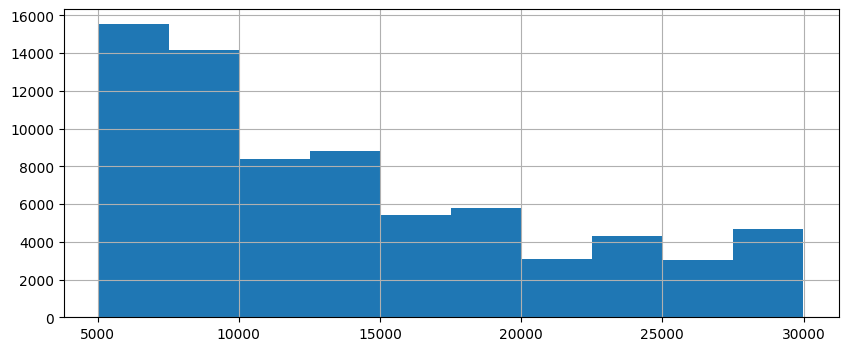

In [31]:
df_price['price'].hist(figsize=(10, 4));

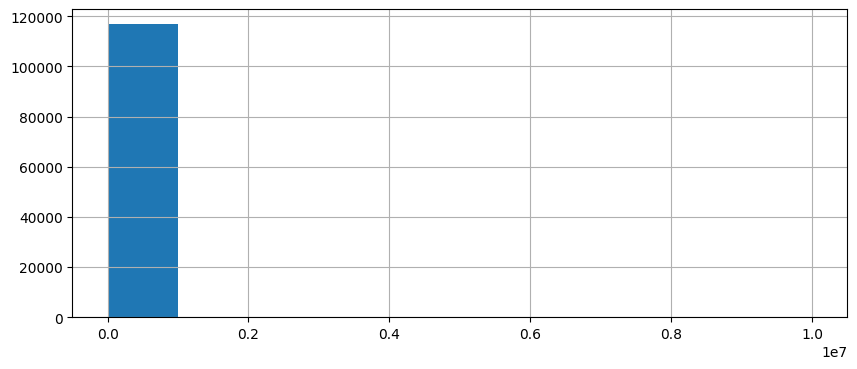

In [32]:
df['odometer'].hist(figsize=(10, 4));

По гистограммам и describe видим, что в цене и пробеге есть нулевые значения. В некоторых объявлениях специально выставлена неадекватно большая цена или пробег. Из-за этого гистограмма цены и пробега выглядит неправильно. Это нужно исправить, выбрав порог цены от 1000$ до 40000$

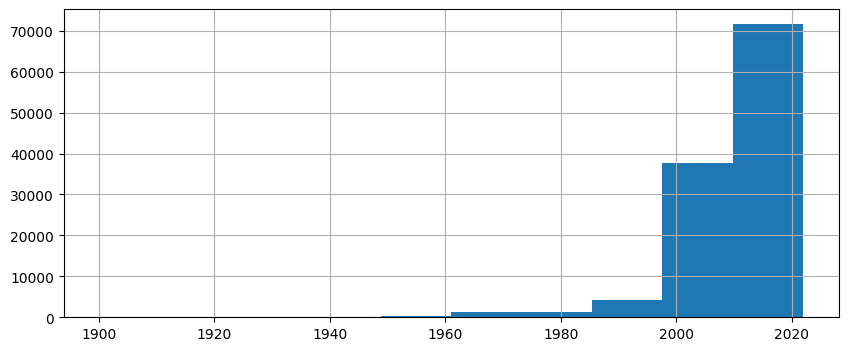

In [33]:
df['year'].hist(figsize=(10, 4));

Также мы видим, что некоторые авто 1905 года выпуска. Возьмем все авто от 2000-го года, поскольку там наибольшее кол-во авто. 

In [34]:
price_unique = get_unique(df,"price")  
price_unique

,variable,value,count
0,price,0,4373
1,price,1,878
2,price,3,2
3,price,4,3
4,price,5,8
...,...,...,...
5240,price,17000000,1
5241,price,123456789,2
5242,price,135008900,1
5243,price,1111111111,1


In [35]:
year_unique = get_unique(df,"year")  
year_unique

,variable,value,count
0,year,1900,1
1,year,1905,1
2,year,1913,2
3,year,1916,1
4,year,1918,1
...,...,...,...
99,year,2018,6085
100,year,2019,4498
101,year,2020,2774
102,year,2021,259


Исправим датасет, согласно нашим замечаниям

In [20]:
df = df[df['price'] > 1000]
df = df[df['price'] < 40000]
df['odometer'] = df['odometer']

df['odometer'] = df['odometer']//5000
df = df[df['odometer'] < 50]
df = df[df['year'] > 2000]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92920 entries, 12 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         92920 non-null  int64 
 1   year          92920 non-null  int64 
 2   manufacturer  92920 non-null  object
 3   condition     92920 non-null  int64 
 4   cylinders     92920 non-null  int64 
 5   fuel          92920 non-null  int64 
 6   odometer      92920 non-null  int64 
 7   transmission  92920 non-null  int64 
 8   drive         92920 non-null  int64 
 9   type          92920 non-null  int64 
 10  paint_color   92920 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 8.5+ MB


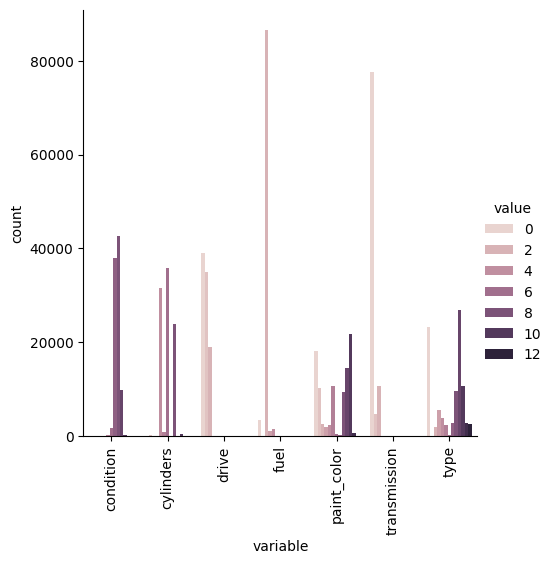

In [15]:
import seaborn as sns
df_uniques = pd.melt(
    frame=df,
    value_vars=["condition","cylinders","fuel","transmission","drive","type","paint_color"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

Снова посмотрим на гистограммы

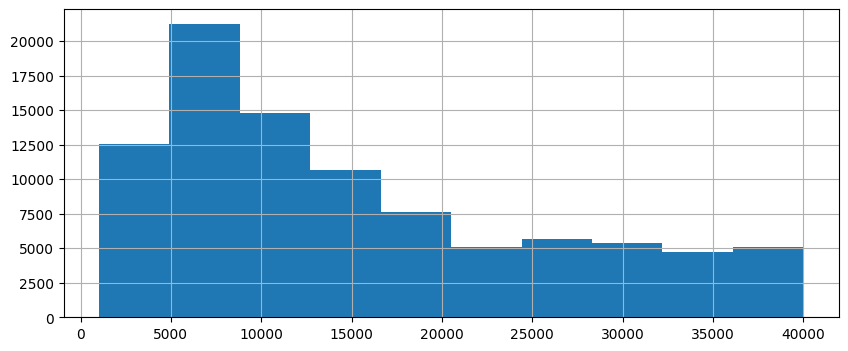

In [16]:
df['price'].hist(figsize=(10, 4));

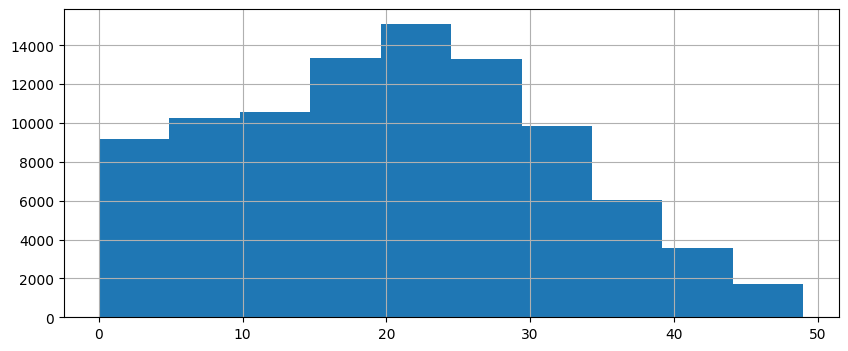

In [17]:
df['odometer'].hist(figsize=(10, 4));

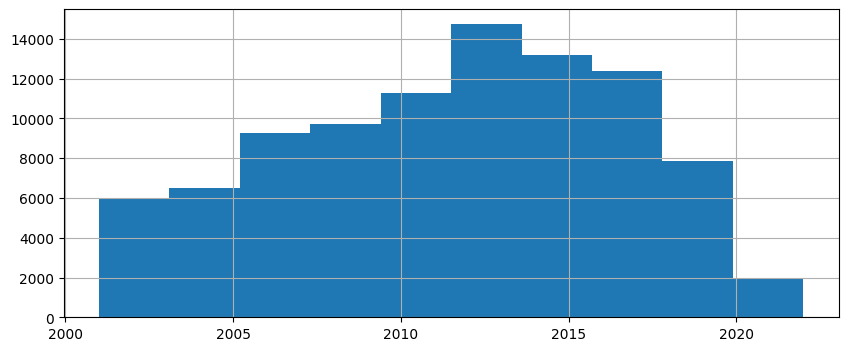

In [18]:
df['year'].hist(figsize=(10, 4));

### 4. Исследовательский анализ данных

Посмотрим средние цены по маркам авто:

['acura', 'alfa-romeo', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo']


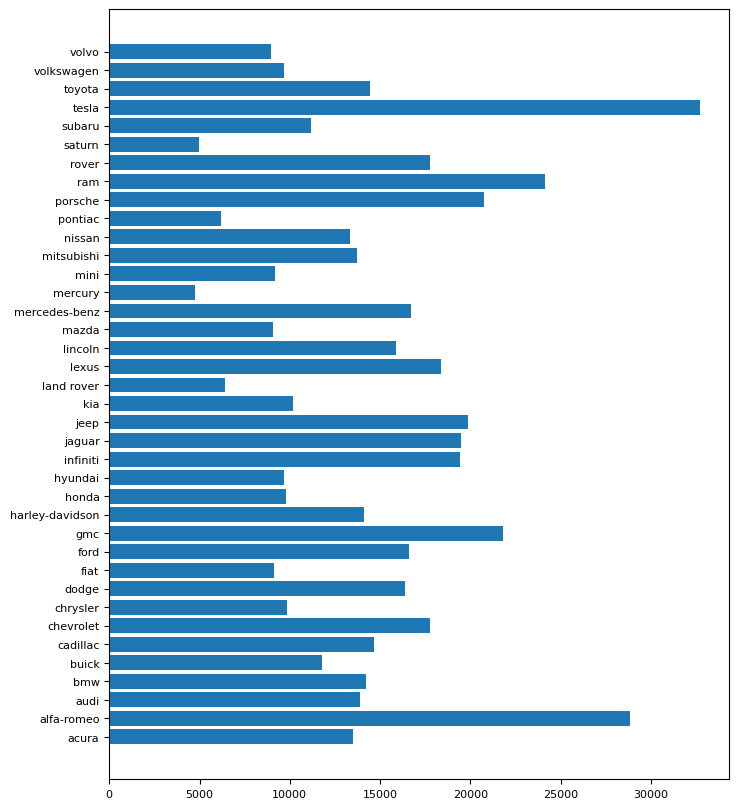

In [22]:
# Должность (job_title)
manufacturers = df.manufacturer.unique().tolist()
manufacturers.sort() # Для удобства отсортируем по алфавиту
print(manufacturers)
len(manufacturers) # Подсчитаем их количество
# Посчитаем средние цены по маркам авто
n = len(manufacturers) 
mean_salaries = np.zeros(n)
for i in range(0,n):
    position = manufacturers[i] #текущая должность
    df_tmp = df[df['manufacturer'] == position] # выбираем соотвествующие записи 
    mean_salaries[i] = df_tmp['price'].mean() # считаем среднее значение
# Визуализируем уровень зарплат в зависимости от должности
fig = plt.figure(figsize=(8, 10))
plt.rc('font', size = 8 ) 
plt.barh(manufacturers, mean_salaries)
plt.show()

Наибольшую среднюю цену имеют Alfa-Romeo, Tesla, Dodge Ram, GMC, Porsche, что вполне очевидно. Alfa-Romeo - импортный итальянский автомобиль премиум сегмента. Tesla - дорогостоящий электрокар. Dodge RAM - популярный у американцев пикап, как и GMC - универсальные рабочие лошадки, но цены рознятся в зависимости от мотора и комплектации. Porsche давно зарекомендовал себя как наилучшее и наиболее качественное немецкое спортивное авто на американском рынке, пусть и за большую цену. 

Посмотрим наиболее дешевую и дорогую марку

In [23]:

max_salary = mean_salaries.max()
min_salary = mean_salaries.min()

max_ind = (mean_salaries.tolist()).index(max_salary)
print("Максимальная стоймость у", manufacturers[max_ind])
min_ind = (mean_salaries.tolist()).index(min_salary)
print("Минимальная стоймость у", manufacturers[min_ind])

Максимальная стоймость у tesla
Минимальная стоймость у mercury


Довольно очевидно, что mercury имеет минимальную стоймость.  Данная марка авто не выпускается с 2011-го и имеет крайне сомнительную репутацию из-за того, что новые модели являются перелицензированными копиями автомобилей компании Ford и Mazda и не отличаются особой надежностью. Тем более, если смотреть данные продаж от дилеров Mercury, компания была в глубоком кризисе. 
(https://en.wikipedia.org/wiki/Mercury_(automobile))

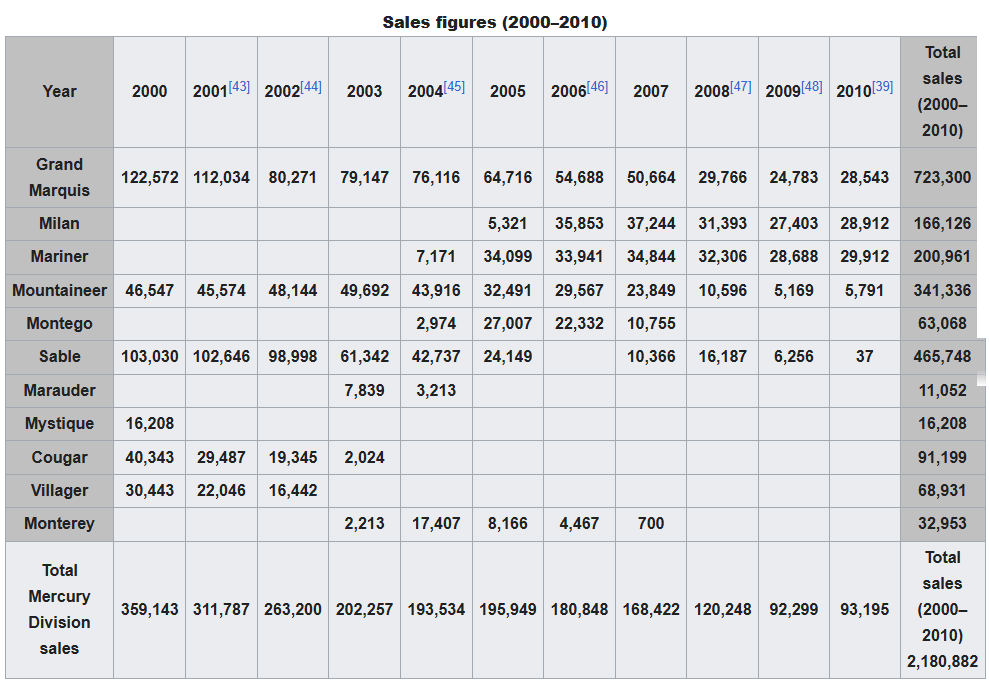

Теперь заменим марки авто на численные данные, вместо категориальных. 

In [24]:

# Encoding categorical features
categorical_columns = ["manufacturer"]
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df['year'] = (df['year']).astype(int)
df['odometer'] = df['odometer'].astype(int)
df.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
12,30000,2014,17,8,6,2,10,0,0,6,10
14,5000,2013,6,8,4,2,30,0,1,9,0
19,11995,2009,23,8,6,2,20,0,2,9,10
20,7995,2011,35,8,4,2,17,0,1,9,5
27,3200,2006,7,8,6,2,21,0,0,12,9
29,6495,2007,18,9,6,2,37,0,1,0,3
30,14495,2008,17,7,6,2,22,2,0,0,5
33,10999,2015,36,9,4,2,18,0,0,0,9
39,25590,2016,27,7,6,2,7,2,1,8,9
40,4995,2003,10,8,8,2,45,0,2,0,9


Посчитаем коэффициенты корреляции для всего датафрейма, округлим значение до сотых.
Выведем полученную корреляционную матрицу.

In [25]:
corr_matrix = df.corr().round(2)
corr_matrix

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.00,0.63,-0.07,-0.02,0.38,-0.05,-0.61,0.50,-0.07,0.05,0.05
year,0.63,1.00,-0.02,0.11,-0.12,0.12,-0.62,0.30,-0.05,0.02,0.01
manufacturer,-0.07,-0.02,1.00,0.02,-0.25,0.02,0.03,-0.02,-0.10,0.01,-0.01
condition,-0.02,0.11,0.02,1.00,-0.13,-0.04,-0.08,-0.31,-0.03,-0.06,0.02
cylinders,0.38,-0.12,-0.25,-0.13,1.00,-0.09,0.05,0.16,0.00,0.06,0.05
fuel,-0.05,0.12,0.02,-0.04,-0.09,1.00,-0.14,0.13,0.04,-0.09,-0.06
odometer,-0.61,-0.62,0.03,-0.08,0.05,-0.14,1.00,-0.42,-0.09,-0.01,0.00
transmission,0.50,0.30,-0.02,-0.31,0.16,0.13,-0.42,1.00,0.05,0.00,-0.02
drive,-0.07,-0.05,-0.10,-0.03,0.00,0.04,-0.09,0.05,1.00,0.16,0.08
type,0.05,0.02,0.01,-0.06,0.06,-0.09,-0.01,0.00,0.16,1.00,0.07


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train_lda = lda.fit_transform(X,y)

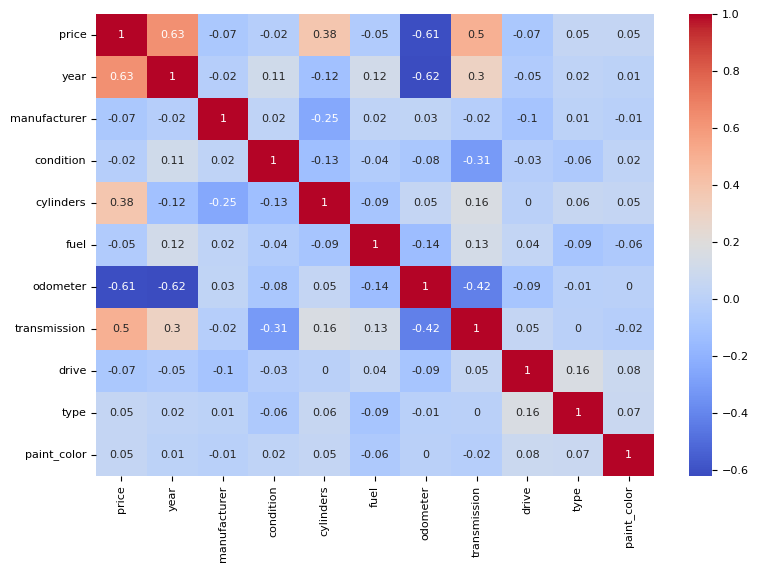

In [26]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

In [65]:
df = df.drop('manufacturer',axis=1)
df = df.drop('condition',axis=1)
df = df.drop('fuel',axis=1)
df = df.drop('drive',axis=1)
df = df.drop('type',axis=1)
df = df.drop('paint_color',axis=1)

Для интереса, можно посмотреть матрицу корреляции и заметить, что, например, тип КПП на 16% зависит от типа авто, что вполне правдиво. Трансмиссия зависит от года выпуска - с развитием автомобилестроения все чаще стали применять автоматическую и роботизированную КПП, поскольку это удобно. Очевидно, что пробег и год взаимосвязаны. Топливо на 13% зависит от года и от типа трансмиссии, что тоже вполне очевидно, если вспомнить про топливный кризис США в 1970-х и массовый переход американских автомобилестроителей с V6 и V8 на R4 (рядные четверки) с передним приводом, вместо заднего, ради экономии топлива. Тогда же на рынке стали массово появлятся дешевые экономичные импортные авто (Toyota). Но, по всей видимости, тенденция не так сильно сохранилась.  

Посмотрим графики цилиндров и трансмиссии. Правда ли, что американцы любят V8? Правда ли, что люди стали массово переходить на автоматическую КПП? 

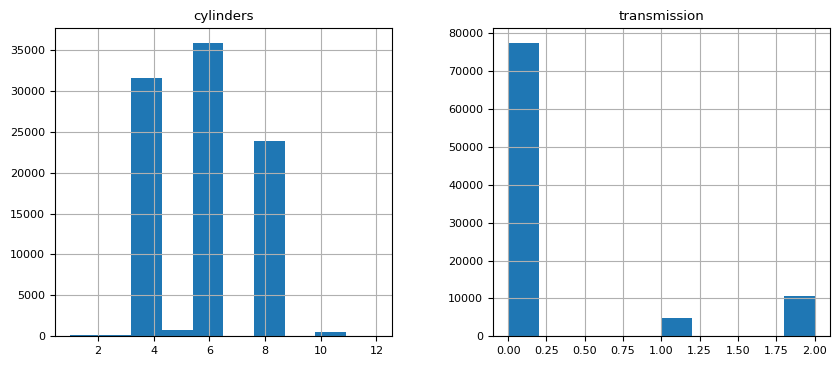

In [27]:
features = ["cylinders", "transmission"]
df[features].hist(figsize=(10, 4));

In [28]:
fuel_unique

,variable,value,count
0,fuel,diesel,6519
1,fuel,electric,193
2,fuel,gas,107248
3,fuel,hybrid,1323
4,fuel,other,1886


In [193]:
cylinders_unique

,variable,value,count
0,cylinders,4 cylinders,35985
1,cylinders,6 cylinders,43425
2,cylinders,8 cylinders,35350


In [194]:
transmission_unique

,variable,value,count
0,transmission,automatic,94435
1,transmission,manual,8200
2,transmission,other,12125


Отчасти, правда, что американцы любят авто помощнее (6 или 8 цилиндров), но есть и приверженцы малолитражных рядных четверок. Что печально, американцы стали переходить на автоматическую коробку передач, судя по количеству объявлений. 

## 4. Задача регресии. Прогнозирование цены на автомобиль

#### Решение задачи через линейную регрессию

In [30]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df))
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04,9.292000e+04
mean,-7.340949e-18,1.704484e-14,3.127550e-17,4.005597e-16,-1.566069e-16,-6.278041e-17,6.576267e-17,-2.676388e-19,-4.133107e-17,3.983994e-17,8.755612e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.348151e+00,-2.180568e+00,-1.537794e+00,-3.736212e+00,-3.039014e+00,-4.100488e+00,-1.784424e+00,-4.274745e-01,-1.033140e+00,-1.463153e+00,-1.392239e+00
25%,-8.024393e-01,-7.252779e-01,-7.818064e-01,-9.272323e-01,-1.151732e+00,6.908148e-02,-7.387942e-01,-4.274745e-01,-1.033140e+00,-1.463153e+00,-1.143511e+00
50%,-3.126373e-01,1.063165e-01,-3.093144e-01,4.772575e-01,1.064558e-01,6.908148e-02,-4.170742e-02,-4.274745e-01,2.839405e-01,4.913109e-01,3.488629e-01
75%,6.871431e-01,7.300122e-01,1.013663e+00,4.772575e-01,1.364644e+00,6.908148e-02,7.425151e-01,-4.274745e-01,2.839405e-01,7.356189e-01,8.463207e-01
max,2.327673e+00,2.185302e+00,1.958647e+00,3.286237e+00,3.881020e+00,4.238650e+00,2.485232e+00,2.622234e+00,1.601021e+00,1.468543e+00,1.343779e+00


In [62]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X = df_scaled.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True) 
# размерность обучающей выборки 
print(X_train.shape, y_train.shape) 
# размерность тестовой выборки 
print(X_test.shape, y_test.shape) 
pipe_lr = make_pipeline(StandardScaler(),LinearRegression())
pipe_lr.fit(X_train, y_train)
y_train_pred  =  pipe_lr.predict(X_train) 
y_test_pred  =  pipe_lr.predict(X_test)
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))

(74336, 10) (74336,)
(18584, 10) (18584,)
 Root Mean Squared Error (RMSE):  5362.755 
R2: 0.75


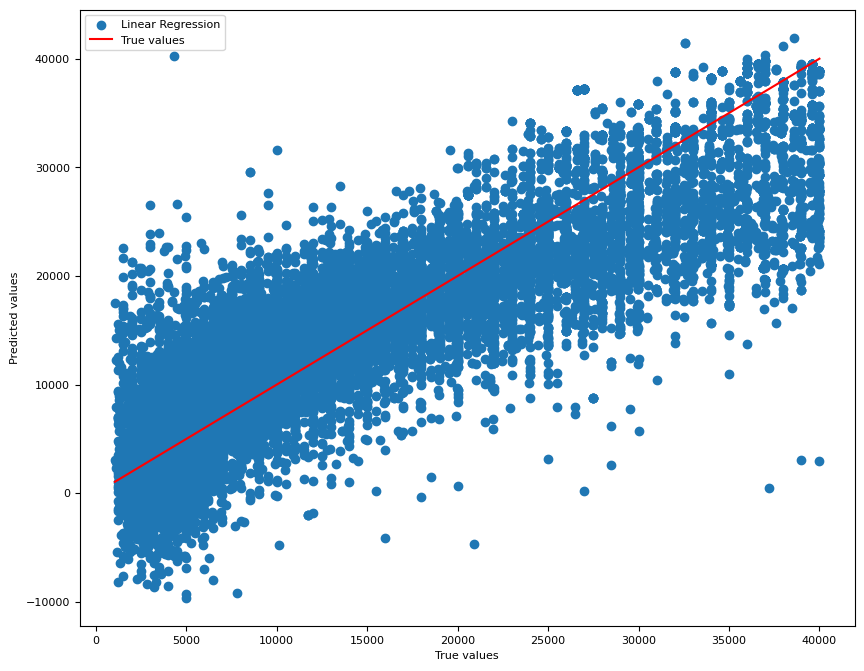

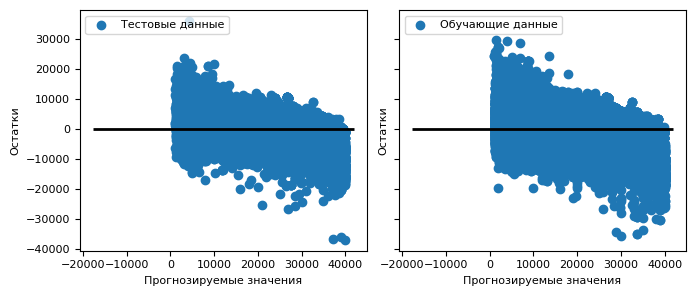

In [73]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
pipe_lr = make_pipeline(StandardScaler(),LinearRegression())
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(pipe_lr, X, y, cv=20, scoring='r2'))

Оценка кросс-валидации на двадцати выборках: 
 [0.73405556 0.72881007 0.74537832 0.73933011 0.75057584 0.7388229
 0.74116922 0.74555243 0.73888708 0.74426534 0.74694427 0.73926791
 0.72917436 0.73444249 0.72983823 0.72953911 0.74118199 0.73454713
 0.73132337 0.74141308]


Решение квадратичной регрессией 

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели
poly_reg_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False), # include_bias=False, т.к. LinearRegression добавит свой
    LinearRegression()
)

poly_reg_pipeline.fit(X_train, y_train)

# Прогнозирование
y_train_pred  =  poly_reg_pipeline.predict(X_train) 
y_test_pred  =  poly_reg_pipeline.predict(X_test)


# Оценка модели
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))

 Root Mean Squared Error (RMSE):  4505.811 
R2: 0.82


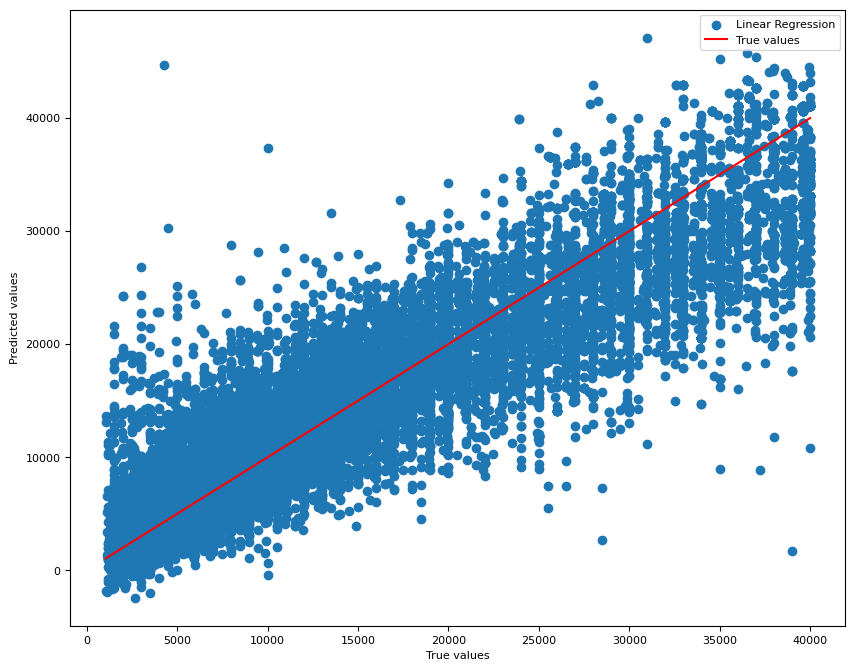

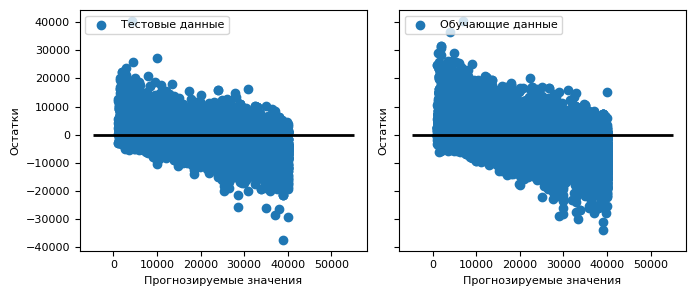

In [87]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
poly_reg_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False), # include_bias=False, т.к. LinearRegression добавит свой
    LinearRegression()
)
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(poly_reg_pipeline, X, y, cv=20, scoring='r2'))

Оценка кросс-валидации на двадцати выборках: 
 [0.80652473 0.80657923 0.82041625 0.81328242 0.81912597 0.81353901
 0.81699761 0.8181545  0.81842328 0.81715824 0.82383555 0.80996509
 0.81465378 0.80790295 0.80425775 0.80601115 0.81693538 0.80646657
 0.80286312 0.81602848]


#### Решение задачи через деревья

In [89]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
# Прогнозирование
y_train_pred  =  tree_model.predict(X_train) 
y_test_pred  =  tree_model.predict(X_test)


# Оценка модели
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))



 Root Mean Squared Error (RMSE):  3947.831 
R2: 0.86


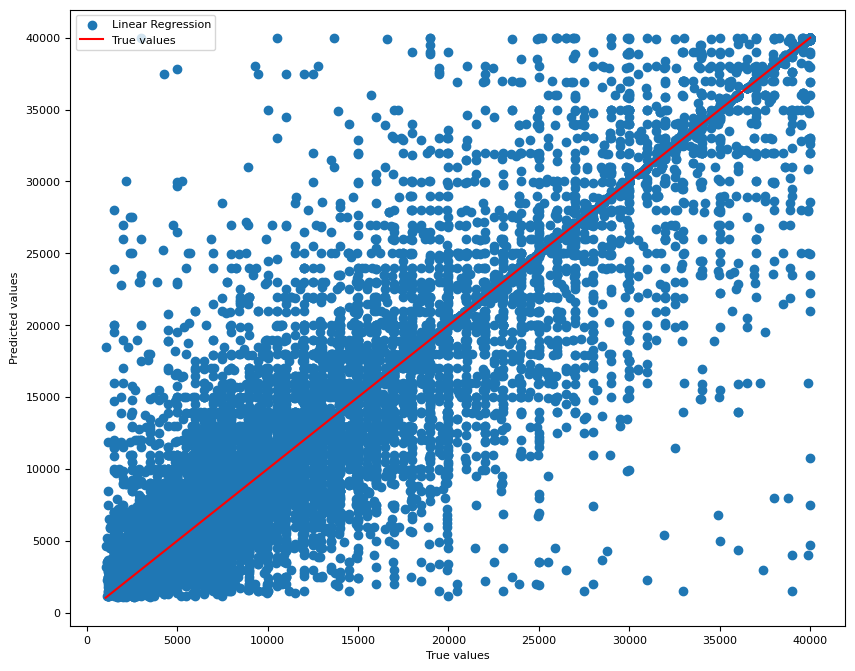

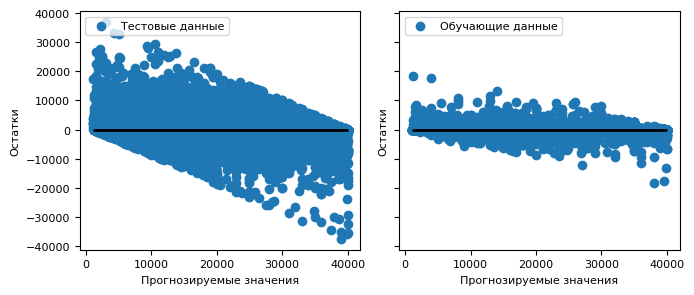

In [92]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
tree_model = DecisionTreeRegressor()
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(tree_model, X, y, cv=20, scoring='r2'))

Оценка кросс-валидации на двадцати выборках: 
 [0.86165118 0.85824224 0.8620501  0.86965881 0.866613   0.87482822
 0.86823996 0.86688816 0.87610808 0.86109415 0.86796982 0.86901786
 0.87032905 0.86621474 0.86201963 0.85995936 0.87691743 0.8664435
 0.87326945 0.86839336]


#### Метод k-ближайших соседей

In [94]:
# из библиотеки sklearn импортируем регрессию по методу k-ближайших соседей 
from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor()
# обучим новую модель
model2.fit(X_train, y_train)
# Прогнозирование
y_train_pred  =  model2.predict(X_train) 
y_test_pred  =  model2.predict(X_test)


# Оценка модели
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))

 Root Mean Squared Error (RMSE):  3634.868 
R2: 0.88


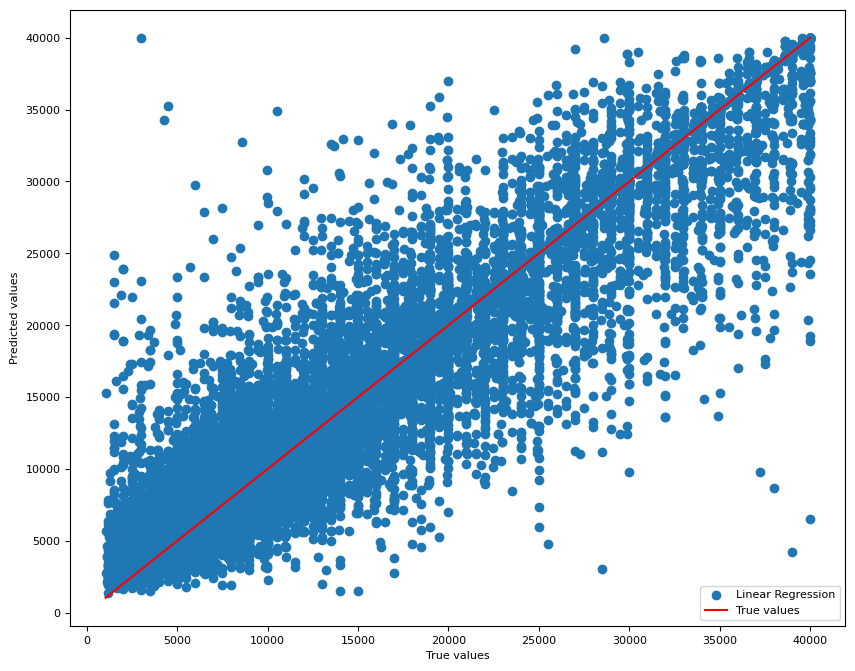

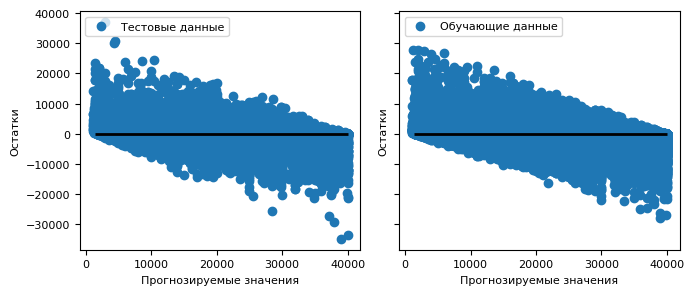

In [95]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor()
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(knn, X, y, cv=20, scoring='r2'))

Оценка кросс-валидации на двадцати выборках: 
 [0.88137825 0.8746346  0.88835997 0.87733325 0.88921952 0.88873235
 0.87764343 0.88145161 0.89549044 0.88495509 0.88764499 0.88441933
 0.89169357 0.87564822 0.87917039 0.87038596 0.87815883 0.88395094
 0.87779251 0.87758205]
